In [1]:
import pandas as pd

#Importing the dataset from github
df=pd.read_csv("https://raw.githubusercontent.com/vineethpetnakota/Amazon-reviews-sentiment-analysis/master/Musical_instruments_reviews.csv",encoding="unicode_escape")
df.head()


reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  unixReviewTime   reviewTime  
0                                   good      1393545600  02 28, 2014  
1                                   Jake      1363392000  03 16, 2013  
2                   It Does The Job Well      1377648000  08 28, 2013  
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4  No more pops when I record my vocals.      1392940800  02 21, 2014

In [2]:
#Dataset inforomation
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


# Preprocessing and cleaning


In [3]:
#Creating a copy
process_reviews=df.copy()

#Checking for null values
process_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [4]:
#Filling the missing values
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

In [5]:
#Concatenating review text and summary

process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

# Creating a sentiment Column

In [6]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [7]:
#Sentiment analysis based on the overall ratings from customers

def sentiment(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [8]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(sentiment, axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews sentiment  
0  Not much to write about here, but it does exac...  Positive  
1  The product does exactly as it should and is q...  Positive  
2  The primary job of this device is to block the...  Positive  
3  Nice windscreen protects my MXL mic and preven...  Positive  
4  This pop filter is great. It looks and perform...  Positive

In [9]:
#Importing related python modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #visualize
from textblob import TextBlob
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import re
import wordcloud
from PIL import Image


In [10]:
#The description of why this code in cell is provided in the quoted string below
'''In terms of stop words, general nltk stop words include phrases like "not," "hasn't," and "wouldn't," all of 
which genuinely convey negativity. That will ultimately contradict the target variable (sentiment) if we eliminate 
it. Therefore, We have chosen stop words that don't have any connotations or unfavorable alternatives.'''

stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [11]:
#lemmatization

import string
import re

def review_cleaning(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Assuming 'process_reviews' is a DataFrame with a column 'reviews'
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: review_cleaning(x))
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews sentiment  
0  Not much to write about here but it does exact...  Positive  
1  The product does exactly as it should and is q...  Positive  
2  The primary job of this device is to block the...  Positive  
3  Nice windscreen protects my MXL mic and preven...  Positive  
4  This pop filter is great It looks and performs...  Positive

# Visual representation of overall sentiment

<AxesSubplot:xlabel='sentiment', ylabel='count'>

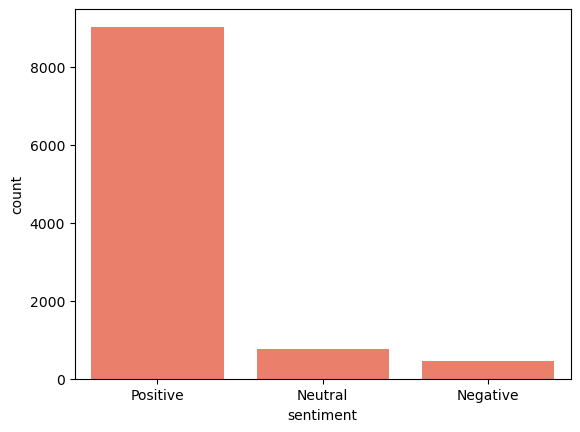

In [12]:
#plot based on sentiment analysis for postive,negative and neutral reviews

sns.countplot(x=process_reviews["sentiment"], color = '#FF7256')

In [13]:
#Applying the lemmitization from above stopwords code to reviews for future text analysis
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews sentiment  
0  Not much write but exactly supposed filters po...  Positive  
1  The product exactly quite affordableI not real...  Positive  
2  The primary job device block breath would othe...  Positive  
3  Nice windscreen protects MXL mic prevents pops...  Positive  
4  This pop filter great It looks performs like s...  Positive

# Creating few more features for text analysis

In [14]:
#adding columns polarity,review_len and wordcount to the dataframe

process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [15]:
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews sentiment  polarity  \
0  Not much write but exactly supposed filters po...  Positive  0.250000   
1  The product exactly quite affordableI not real...  Positive  0.014286   
2  The primary job device block breath would othe...  Positive  0.167500   
3  Nice windscreen protects MXL mic prevents pops...  Positive  0.250000   
4  This pop filter great It looks performs like s...  Positive  0.800000   

   review_len  word_count  
0         162          25  
1         366          59  
2         340          54  
3         182          25  
4         146          24

# sentiment polarity distribution

In [16]:
import cufflinks as cf
import plotly
import plotly.offline as pyo

# Configure Plotly to work in a notebook
pyo.init_notebook_mode(connected=True)

# Configure cufflinks with offline mode
cf.go_offline()


process_reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

# Review Rating Distribution

In [17]:
#Code for rating distribution
process_reviews['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [18]:
#Filtering data for positive negative and neutral reviews
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()


# Word cloud for positive reviews 

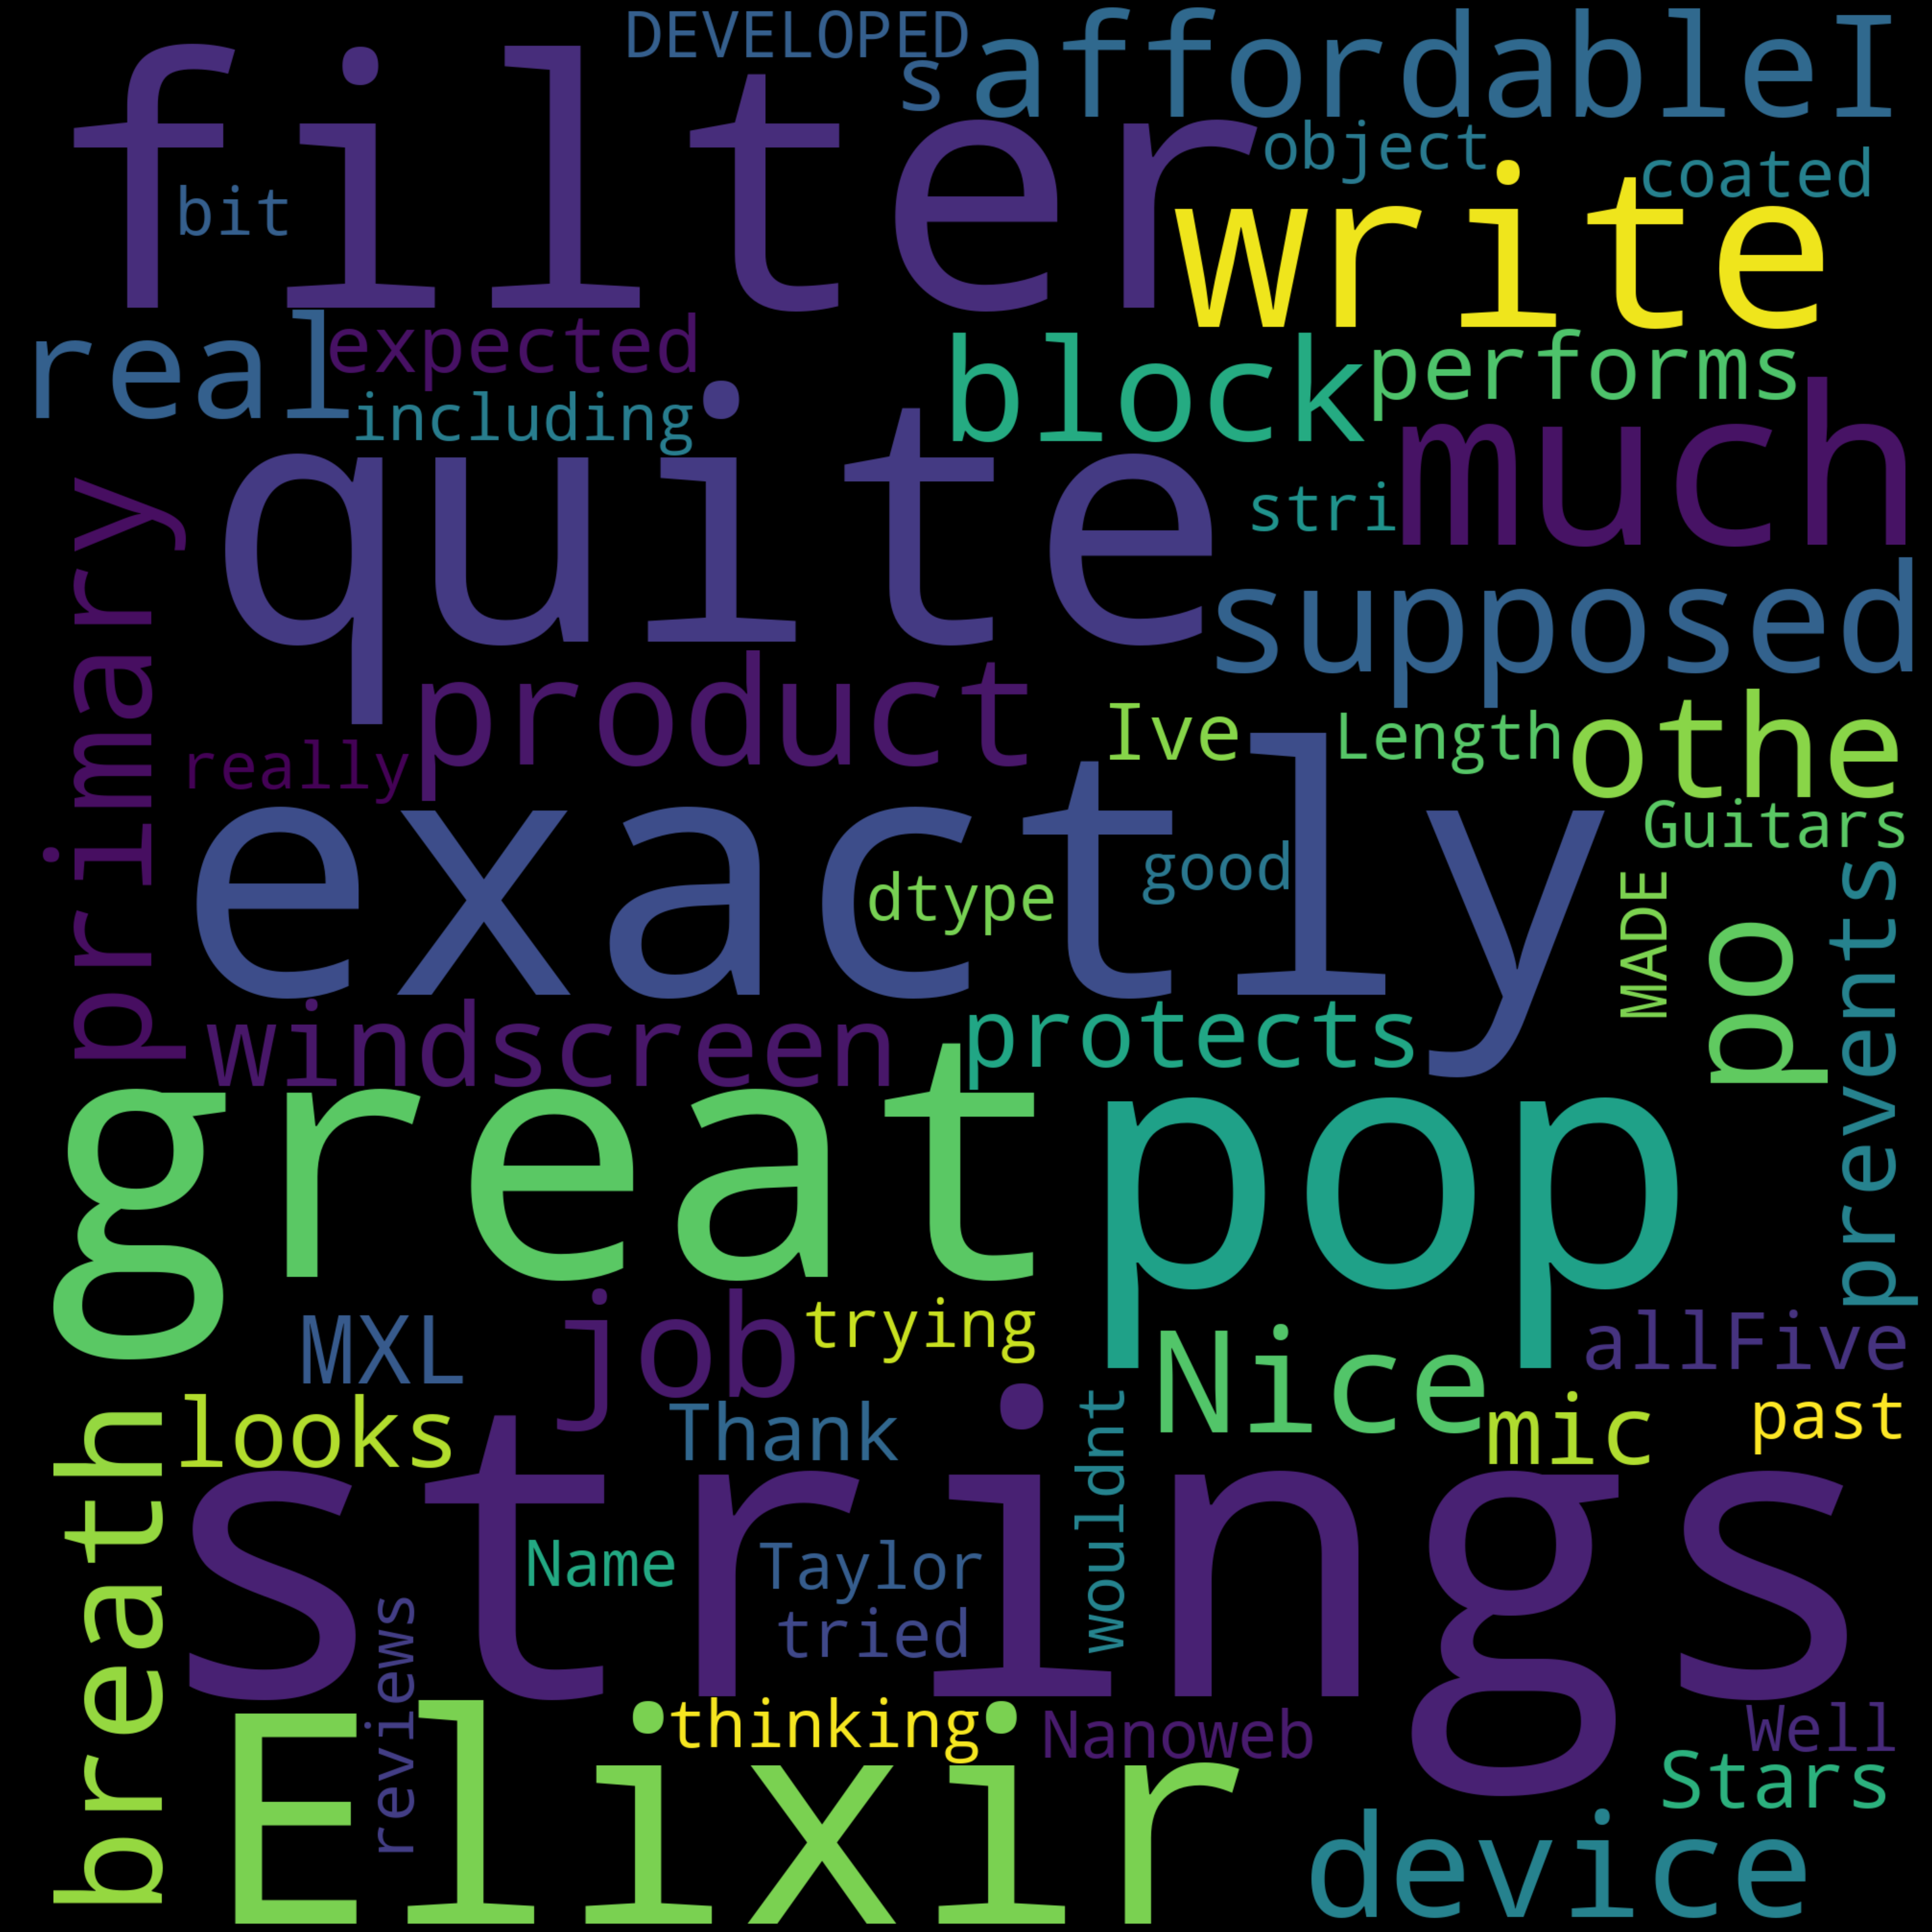

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = review_pos['reviews']

wordcloud = WordCloud(
    width=2000,
    height=2000,
    background_color='black',
    stopwords=STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize=(40, 30),
    facecolor='k',
    edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# Word cloud for neutral reviews

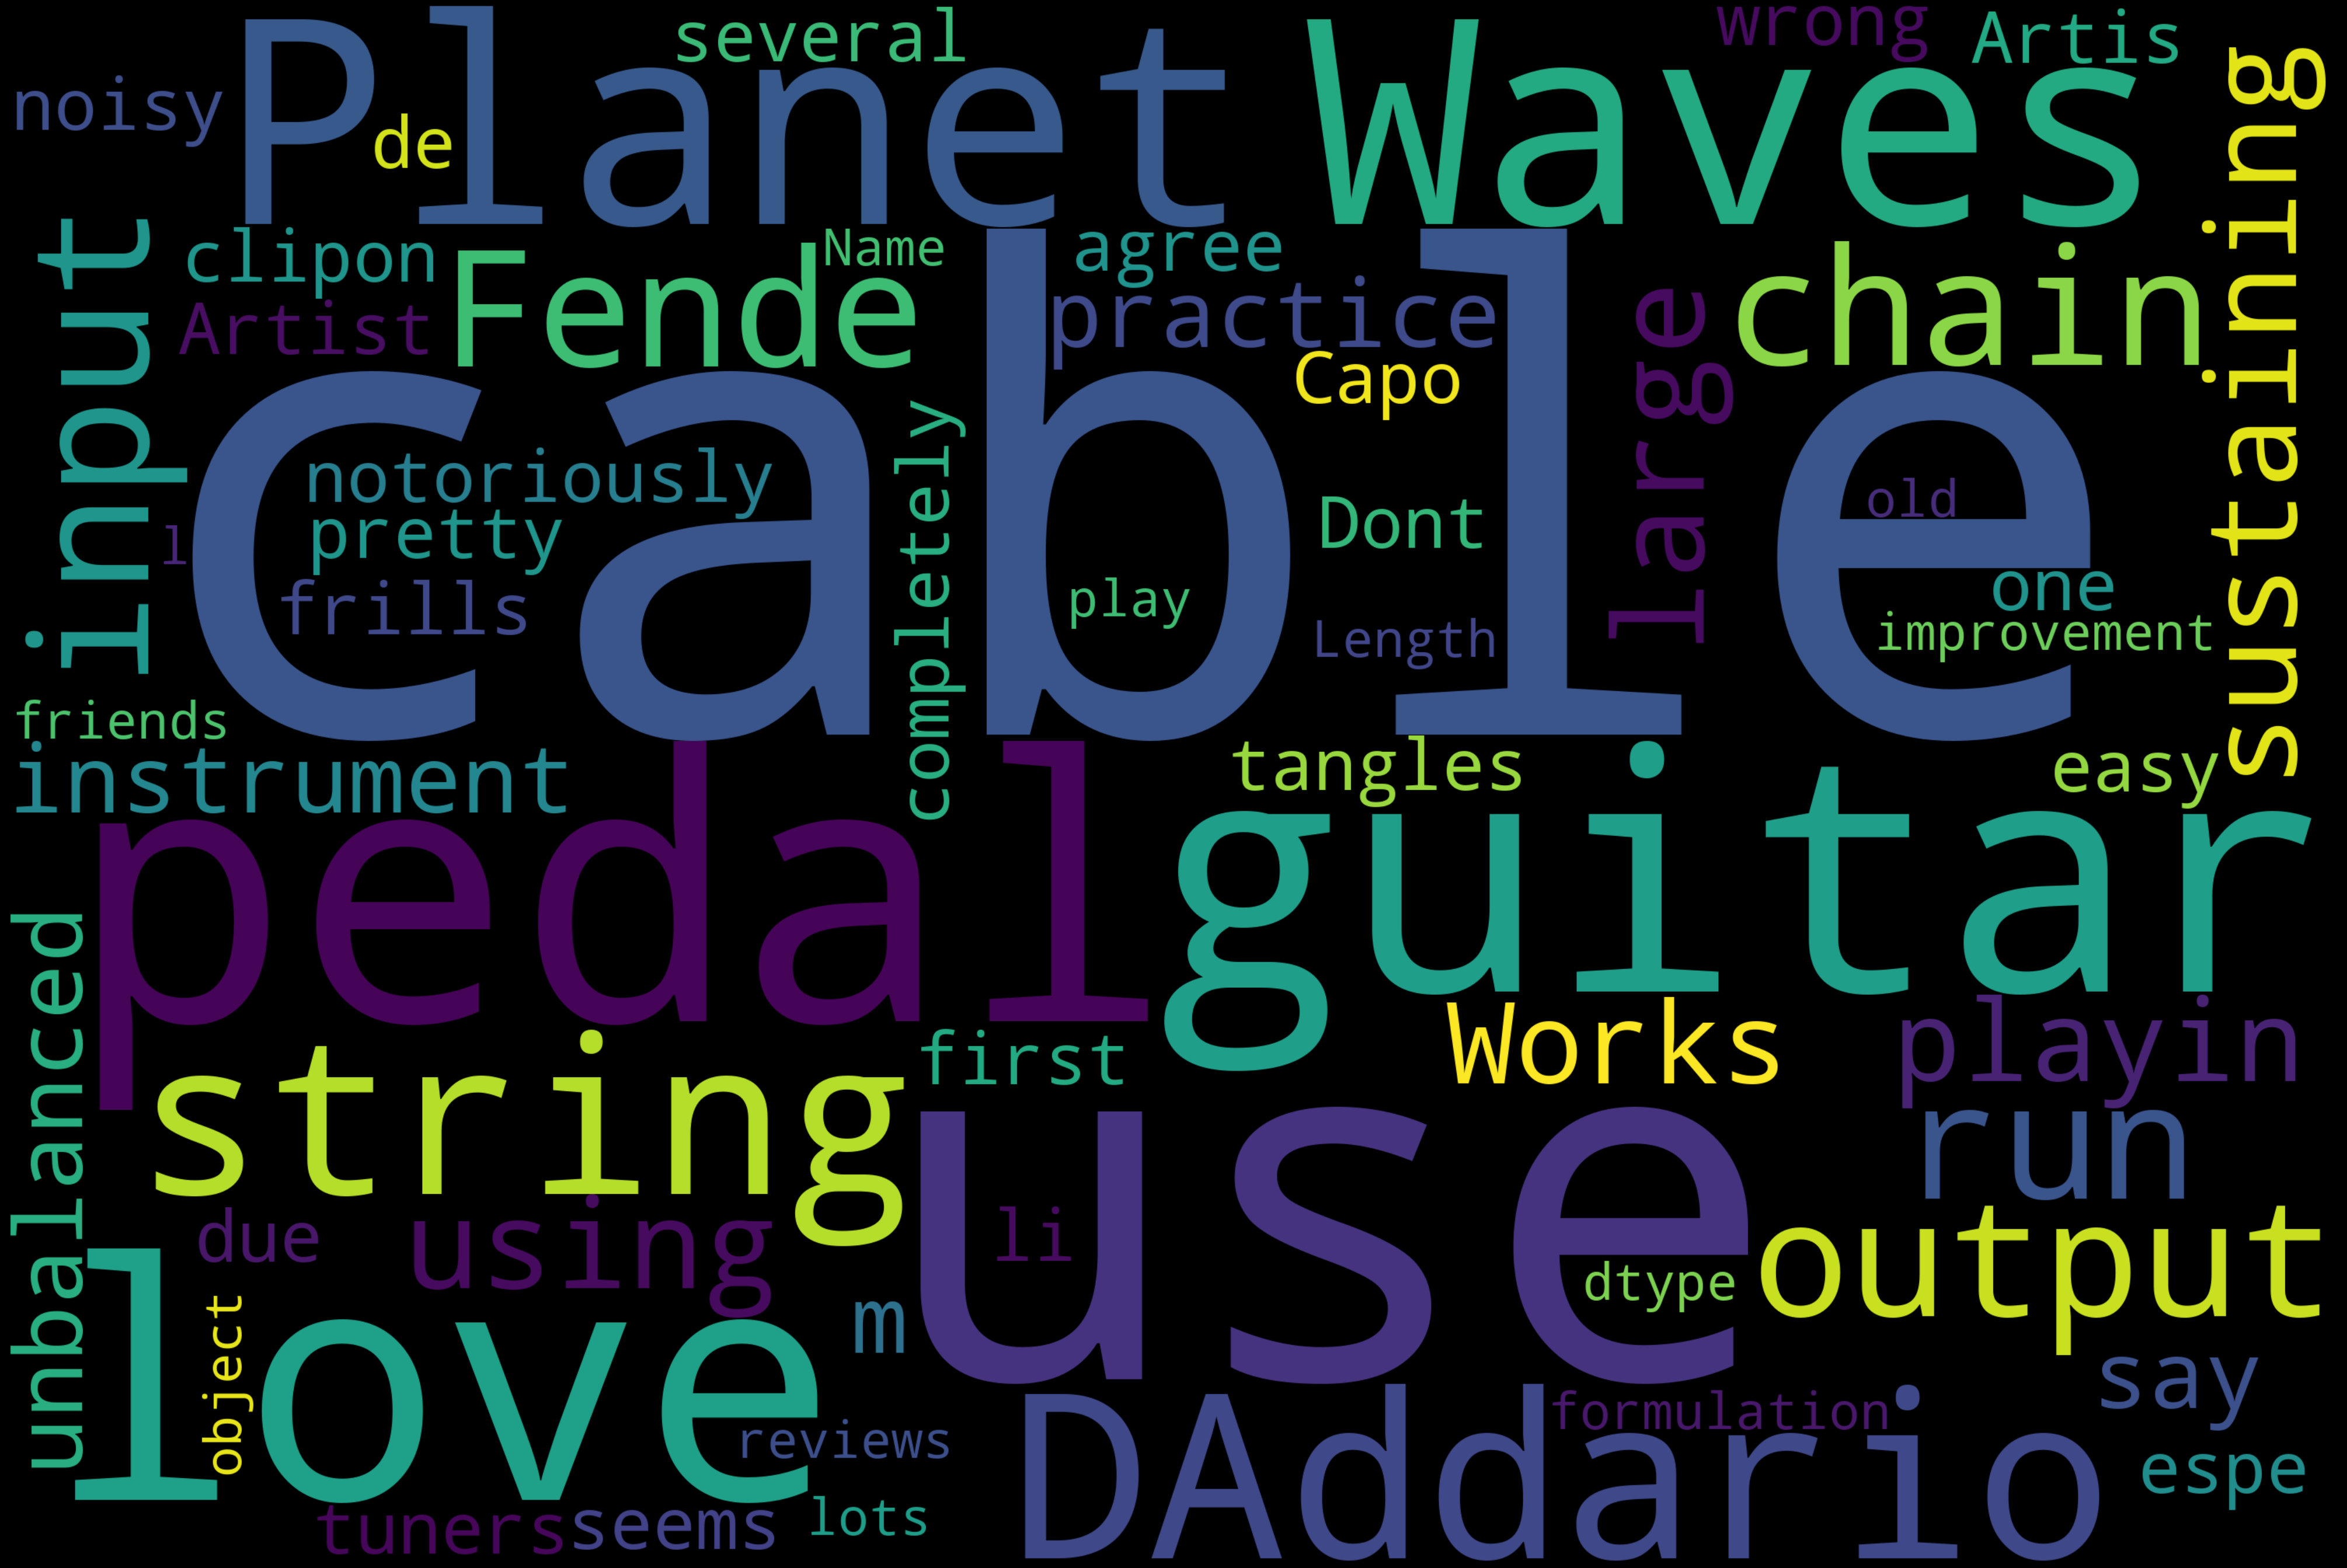

In [20]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word cloud for Negative reviews

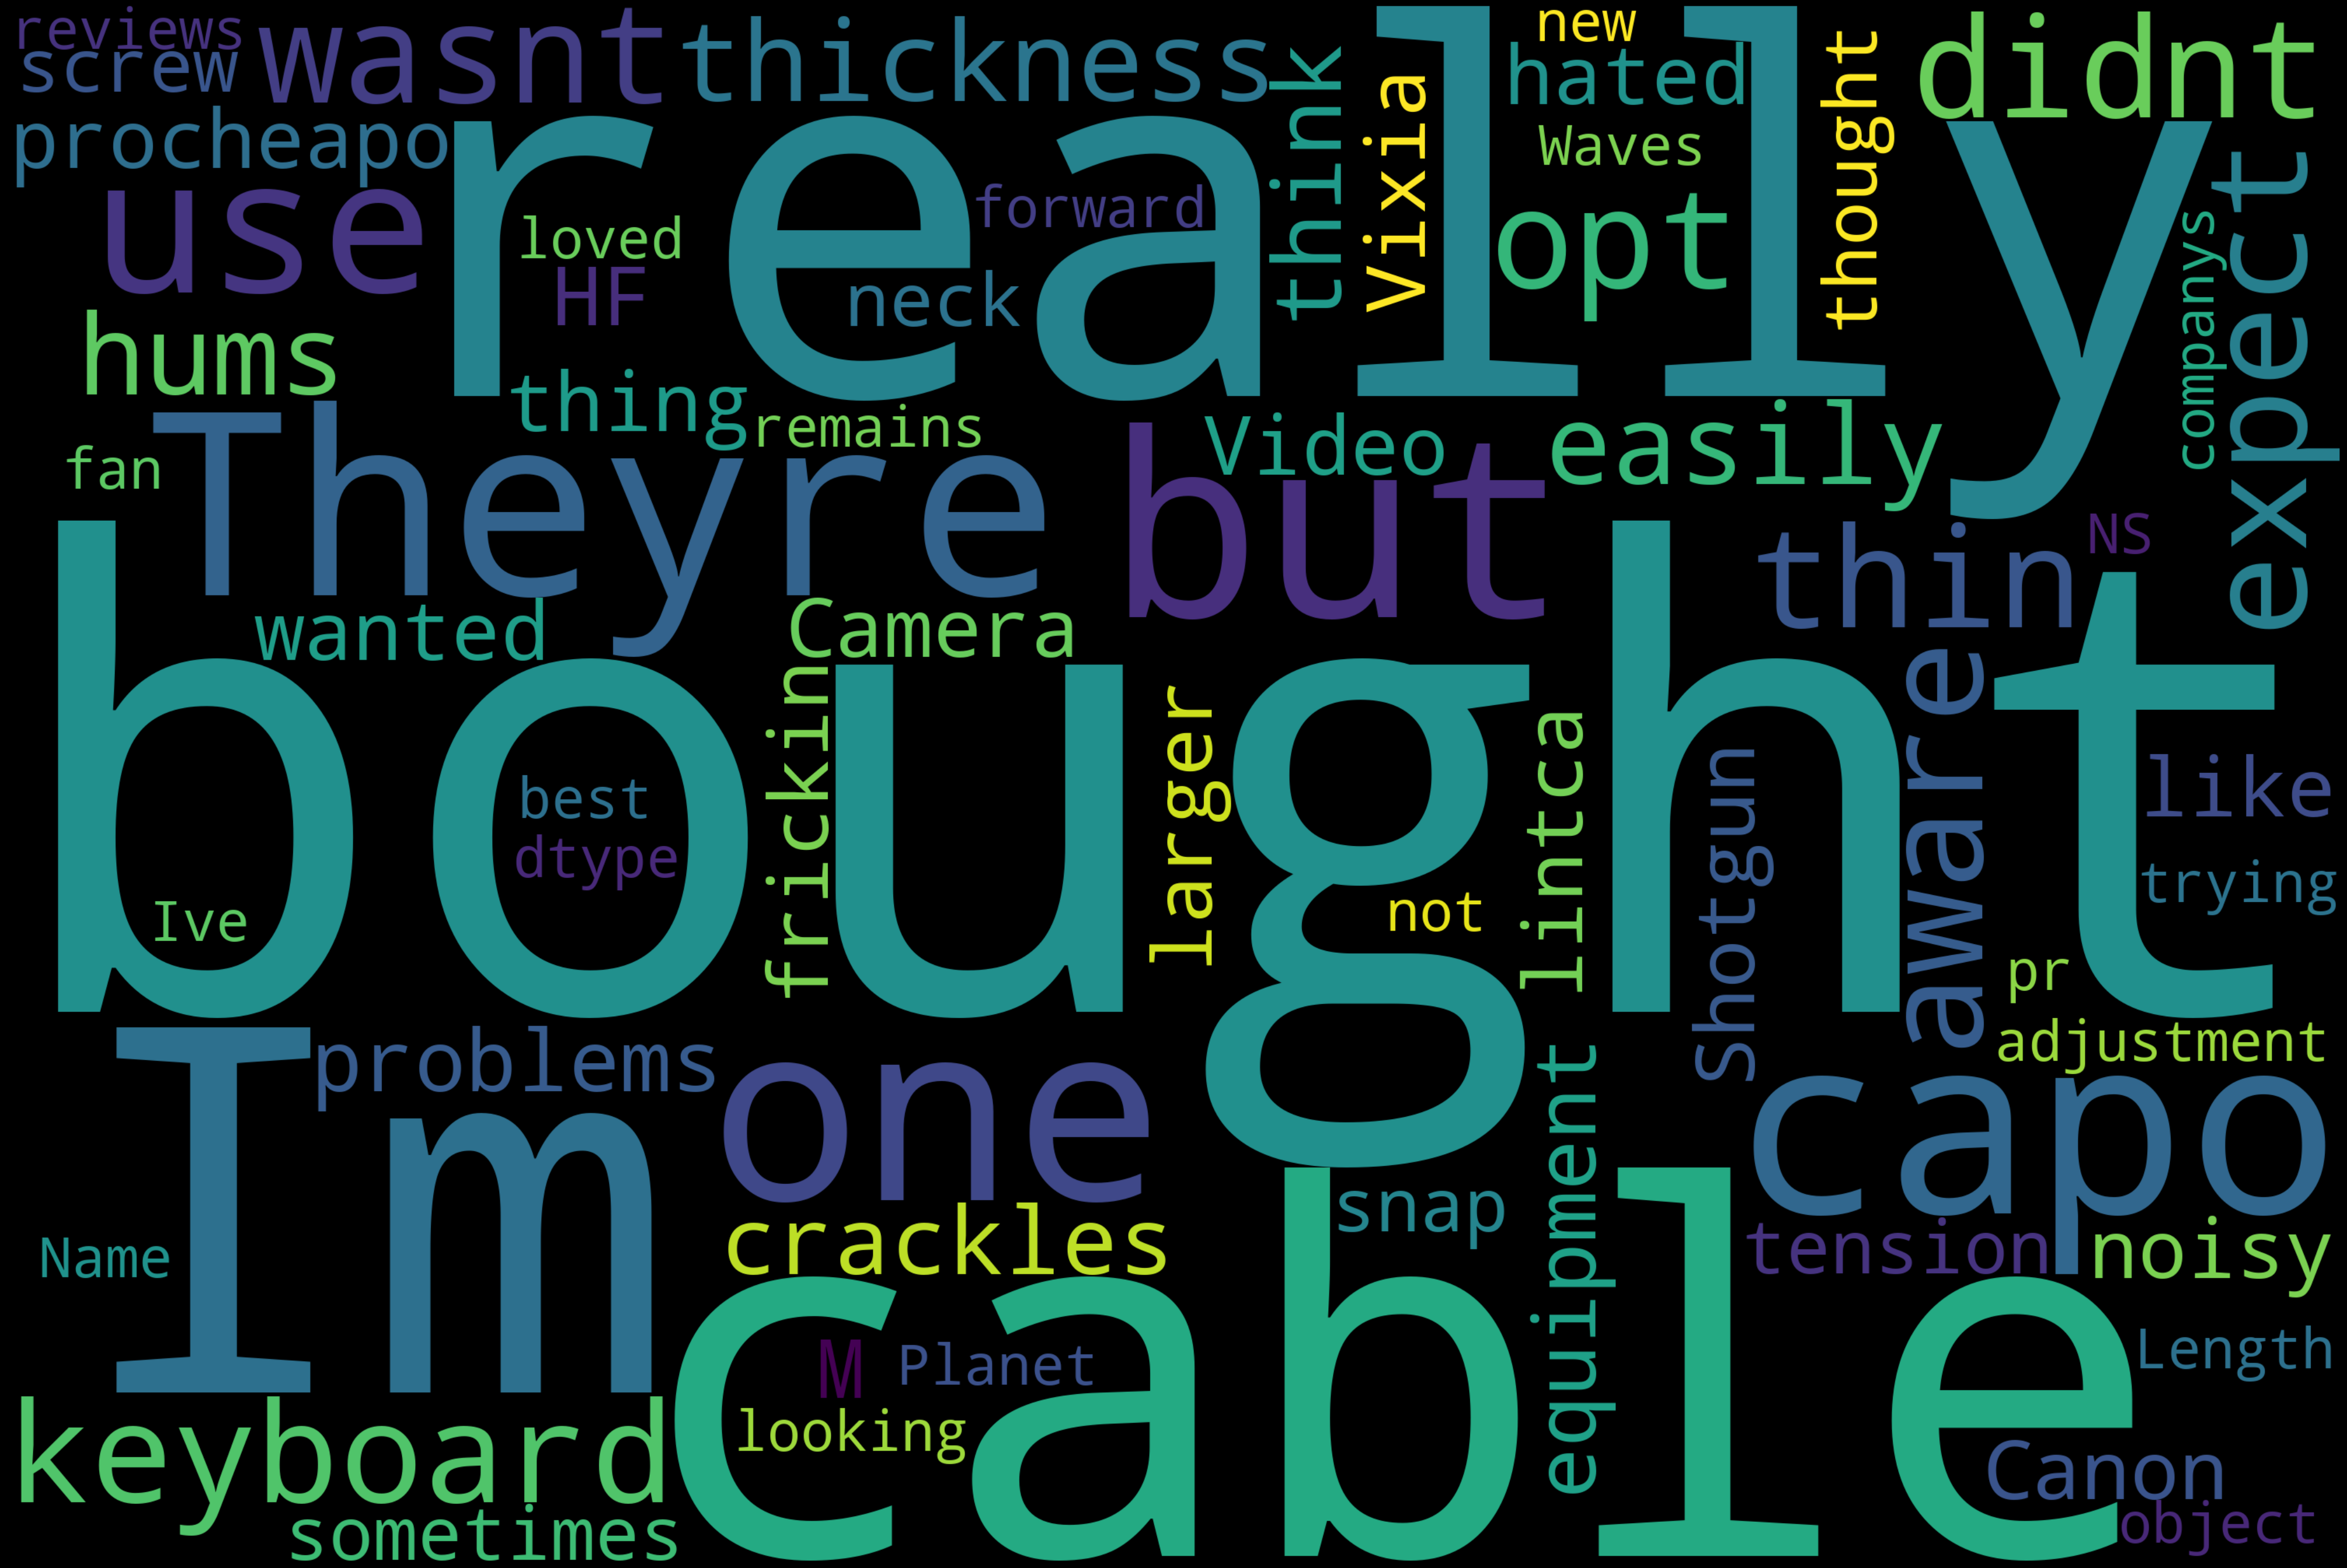

In [21]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# TFIDF(Term Frequency — Inverse Document Frequency

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with a maximum of 5000 features and considering only bigrams (2-grams)
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

# Fit the TF-IDF vectorizer on the 'reviews' column of the 'process_reviews' DataFrame
# and transform the text data into a TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(process_reviews['reviews'])


In [23]:
X.shape

(10261, 5000)

In [24]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

# Handling Imbalance target feature-SMOTE

In [25]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Assuming 'y' is target variable in an imbalanced dataset
print(f'Original dataset shape : {Counter(y)}')

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Assuming 'X' and 'y' are defined and hold your features and target variable respectively
X_res, y_res = smote.fit_resample(X, y)
print(f'Resampled dataset shape : {Counter(y_res)}')


Original dataset shape : Counter({'Positive': 9022, 'Neutral': 772, 'Negative': 467})
Resampled dataset shape : Counter({'Positive': 9022, 'Neutral': 9022, 'Negative': 9022})


# Training testing and splitting data

In [28]:
from sklearn.model_selection import train_test_split


## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

# Assuming X and y are your feature matrix and target vector respectively
# Assuming cv_models is a list of your models and cv_dict is a dictionary with model names
cv_models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), BernoulliNB()]
cv_dict = {0: "Logistic Regression", 1: "Decision Tree", 2: "K-Nearest Neighbors", 3: "Support Vector Machine", 4: "Naive Bayes"}

for i, model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i], cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()))


Logistic Regression Test Accuracy: 0.8807135224190521
Decision Tree Test Accuracy: 0.8222393048508971
K-Nearest Neighbors Test Accuracy: 0.8793489050984056
Support Vector Machine Test Accuracy: 0.8796413976627168
Naive Bayes Test Accuracy: 0.8034284835750526


# Classification Report for all the algorithms used

In [31]:
#this code is to generate classification reports for the algorithms by using cross validation prediction

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

for i, model in enumerate(cv_models):
    y_pred = cross_val_predict(model, X, y, cv=10)
    print(f"Classification Report for {cv_dict[i]}:\n")
    print(classification_report(y, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

    Negative       0.72      0.03      0.05       467
     Neutral       0.44      0.02      0.04       772
    Positive       0.88      1.00      0.94      9022

    accuracy                           0.88     10261
   macro avg       0.68      0.35      0.34     10261
weighted avg       0.84      0.88      0.83     10261

Classification Report for Decision Tree:

              precision    recall  f1-score   support

    Negative       0.18      0.16      0.17       467
     Neutral       0.15      0.13      0.14       772
    Positive       0.90      0.91      0.91      9022

    accuracy                           0.82     10261
   macro avg       0.41      0.40      0.41     10261
weighted avg       0.81      0.82      0.82     10261

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

    Negative       0.67      0.00      0.01  

/Users/vineethpetnakota/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/vineethpetnakota/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/vineethpetnakota/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report for Naive Bayes:

              precision    recall  f1-score   support

    Negative       0.09      0.11      0.10       467
     Neutral       0.17      0.14      0.15       772
    Positive       0.89      0.90      0.89      9022

    accuracy                           0.80     10261
   macro avg       0.38      0.38      0.38     10261
weighted avg       0.80      0.80      0.80     10261



# Confusion matrix

/Users/vineethpetnakota/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<Figure size 640x480 with 0 Axes>

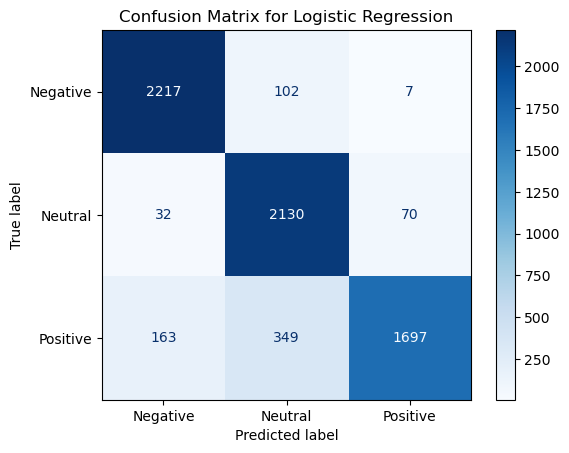

<Figure size 640x480 with 0 Axes>

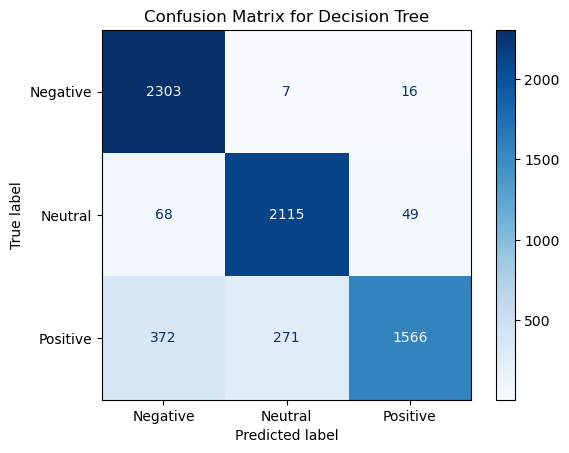

<Figure size 640x480 with 0 Axes>

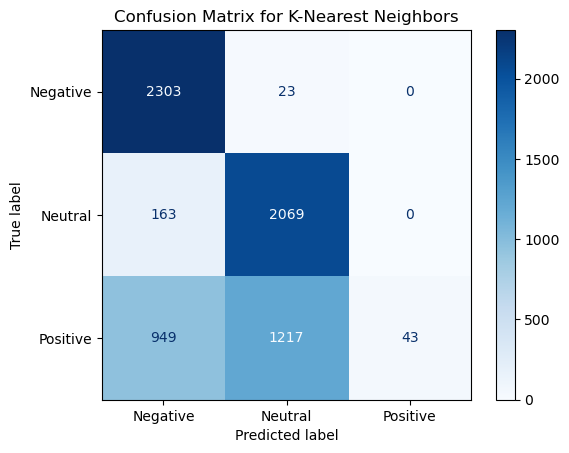

<Figure size 640x480 with 0 Axes>

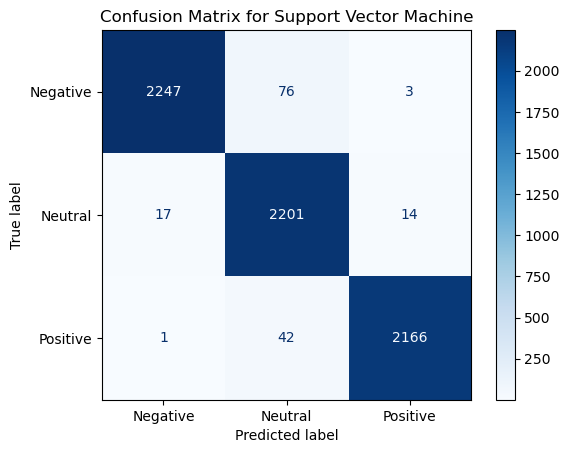

<Figure size 640x480 with 0 Axes>

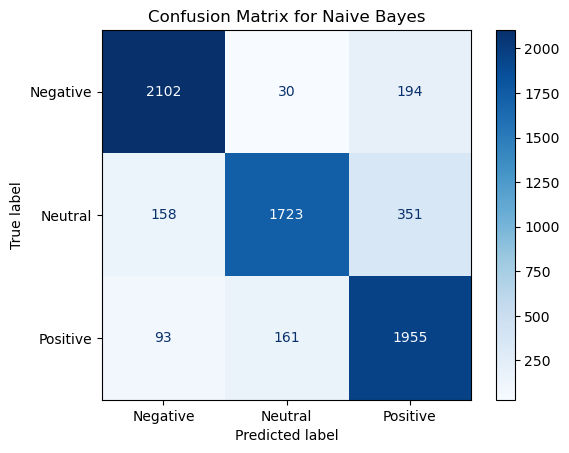

In [34]:
#This code is to implement confusion matrix for all the models we have used and plotting them individually

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negative', 'Neutral', 'Positive'])
plt.figure()
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Negative', 'Neutral', 'Positive'])
plt.figure()
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Negative', 'Neutral', 'Positive'])
plt.figure()
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()

# Support Vector Machine
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Negative', 'Neutral', 'Positive'])
plt.figure()
disp_svc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()

# Naive Bayes
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Negative', 'Neutral', 'Positive'])
plt.figure()
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()
